# Big homework for Pandas.

Name: [complete here]

## 0. Import packages here

In [ ]:
import pandas as pd
import numpy as np

## 1. Euro 2012 stats


The problems below to be solved using the csv file `Euro_2012_stats.csv`. Assign the dataframe to a variable called `euro12`

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
Euro_stats= pd.read_csv('/content/drive/MyDrive/datasets/Euro_2012_stats.csv')
euro12=pd.DataFrame(Euro_stats)

Mounted at /content/drive


#### 1.1 Plot distribution of Goals scored

<Axes: >

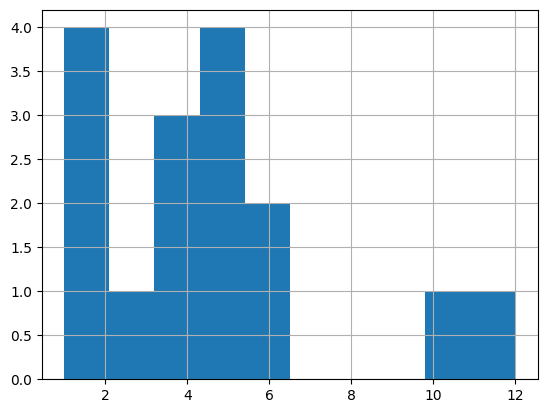

In [ ]:
euro12['Goals'].hist()

#### 1.2 How many teams particiapted in the Euro 2012?

In [ ]:
euro12.shape[0]

16

#### 1.3 How many stats were recorded in the dataset?

In [ ]:
euro12.shape[1]-1 #?

34

#### 1.4 Show only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called `discipline`

In [ ]:
discipline= euro12[['Team','Yellow Cards','Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


#### 1.5 Sort the teams by Red Cards, then by Yellow cards (from highest to lowest)

In [ ]:
euro12.sort_values(by='Red Cards',ascending=False) #discipline or euro12?
euro12.sort_values(by='Yellow Cards',ascending=False)

#### 1.6 Calculate the mean Yellow Cards given per Team. Round it to 1 decimal point

In [ ]:
euro12['Yellow Cards'].mean()

7.4375

#### 1.7 Show teams that scored more than 6 goals

In [ ]:
euro12.loc[euro12['Goals']>6,['Team']]

,Team
5,Germany
13,Spain


#### 1.8 Show teams that start with G

In [ ]:
condition=(euro12['Team'].astype(str).str[0]=='G')
euro12.loc[condition, ['Team']]

,Team
5,Germany
6,Greece


#### 1.9 Present only Shooting Accuracy from Sweden, Spain, Croatia, France, Portugal

In [ ]:
euro12.loc[euro12['Team'].isin(['Sweden', 'Spain', 'Croatia', 'France', 'Portugal']), ['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
0,Croatia,51.9%
4,France,37.9%
10,Portugal,34.3%
13,Spain,55.9%
14,Sweden,47.2%


#### 1.10 What metric is a good predictor of Goals?*

*Hint: this is what Barcelona fans, coaches, players believe. Real Madrid fans (like me) consider it overrated.  

In [ ]:
corr=euro12.corr(method='pearson')
sorted=corr['Goals'].sort_values(ascending=False)
sorted.drop(['Goals'], inplace=True) #removing the first line which is a correlation of 'goals' with itself
print(sorted.head(1)) #taking the next highest

Passes    0.838497
Name: Goals, dtype: float64


<ipython-input-47-cd0931180fe4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=euro12.corr(method='pearson')


Index(['Passes'], dtype='object')

#### 1.11 What two different metrics are the most correlated?*

*answer however you like, it is a bit complex

In [ ]:
def max_of_column(x): # the function identifies the maximum corr value in a raw after 1(which is corr with itself)
  for i in range(1,len(x)):
    if x.sort_values()[len(x)-i]!=1:
      return (x.sort_values()[len(x)-i])
    else:
      continue

top_corr={
    'max_of_column':[],
}
top_corr_df=pd.DataFrame(top_corr)
top_corr_df['max_of_column']=corr.apply(max_of_column) #uses the above function for the top_corr_df dataframe
max=top_corr_df.sort_values(by=['max_of_column'], ascending=False) #sorts the table
max.head(2).index #shows the variables with the highest correlation

Index(['Passes', 'Passes completed'], dtype='object')

## 2. Alcohol consumption

The problems below to be solved using the csv file `global_alcohol_consumption.csv`. Assign the dataframe to a variable called `drinks`

In [ ]:
alcohol_cons=pd.read_csv('/content/drive/MyDrive/datasets/global_alcohol_consumption.csv')
drinks=pd.DataFrame(alcohol_cons)
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


#### 2.1 Which continent drinks more beer on average?

`Answer`: ?

In [ ]:
beer_top=drinks.groupby('continent').mean().sort_values(by='beer_servings', ascending=False).head(1)
beer_top

<ipython-input-209-2286c0fc12de>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  beer_top=drinks.groupby('continent').mean().sort_values(by='beer_servings', ascending=False).head(1)


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
EU,193.777778,132.555556,142.222222,8.617778


#### 2.2 For each continent print the statistics for wine consumption

In [ ]:
drinks.groupby('continent').describe(percentiles=[0.05, 0.5, 0.9]).T.loc['wine_servings']

#### 2.3 Print the min, mean, median, max values of spirit consumption by continent

In [ ]:
spirit_stats=drinks.groupby('continent').describe(percentiles=[0.05, 0.5, 0.9]).T.loc['spirit_servings'].T
spirit_stats['median']=drinks.groupby('continent').median().T.loc['spirit_servings']
spirit_stats

<ipython-input-200-916882180529>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  spirit_stats['median']=drinks.groupby('continent').median().T.loc['spirit_servings']


,count,mean,std,min,5%,50%,90%,max,median
continent,,,,,,,,,
AF,53.0,16.339623,28.102794,0.0,0.0,3.0,42.8,152.0,3.0
AS,44.0,60.840909,84.362160,0.0,0.0,16.0,191.1,326.0,16.0
EU,45.0,132.555556,77.589115,0.0,30.0,122.0,232.6,373.0,122.0
OC,16.0,58.437500,70.504817,0.0,0.0,37.0,139.5,254.0,37.0
SA,12.0,114.750000,77.077440,25.0,30.5,108.5,176.2,302.0,108.5


#### 2.4 How many countries are top 10% drinkers of beer? Show only 10 countries with the highest consumption.

Hint: top 25% are defined as those where consumption >= 75% percentile in the dataset.


`Answer (# countries)`: ?

In [ ]:
def find_top_ten(x,num):
  percentile=x.describe(percentiles=[0.1,0.5,0.9])[6]
  if num==1:#in first case returns top 10 countries and the number of 10% drinker countries
    top=drinks.loc[x>percentile,['country']].head(10)
    count=drinks.loc[x>percentile,['country']].count()
    return count,top
  elif num==2:#in second case returns the whole list of 10% drinker countries
    top=drinks.loc[x>percentile,['country']].reset_index(drop=True)
    return top

top_ten_beer=find_top_ten(drinks['beer_servings'],1)

print("The number of top 10% countries:",top_ten_beer)

The number of top 10% countries: (country    20
dtype: int64,            country
8        Australia
9          Austria
16         Belgium
17          Belize
45  Czech Republic
60         Finland
62           Gabon
65         Germany
81         Ireland
93          Latvia)


#### 2.5 How many countries are top 10% drinkers measured by pure alcohol? Show only 10 countries with the highest consumption

Hint: top 25% are defined as those where consumption >= 75% percentile in the dataset.


`Answer (# countries)`: ?

In [ ]:
top_ten_alco=find_top_ten(drinks['total_litres_of_pure_alcohol'],1)

print("The number of top 10% countries:",top_ten_alco)

The number of top 10% countries: (country    17
dtype: int64,            country
3          Andorra
15         Belarus
16         Belgium
45  Czech Republic
61          France
65         Germany
68         Grenada
75         Hungary
81         Ireland
93          Latvia)


#### 2.6 Create a dataframe that will contain all countries which are top 10% drinkers in at least in one category (beers, spirits, wine).

Hint: the top 10% drinker is defined by having consumption >=90% percentile.

The schema of desired table:

| Column name | type |  description |
|----------|----------|----------|
| country    | str     | country name     |
| is_top10_beer   | bool     | Is Top 10% drinker of beer |
| is_top10_wine   | bool     | Is Top 10% drinker of wine |
| is_top10_spirit   | bool     | Is Top 10% drinker of spirit |




<b>Extra questions</b>:
* How many countries? Answer: ?
* What countries are in all 3 categories (if any)? Answer:  ?
* What countries are in 2 categories (if any)? Answer: ?

In [ ]:
beer_top=find_top_ten(drinks['beer_servings'],2)
wine_top=find_top_ten(drinks['total_litres_of_pure_alcohol'],2)
spirit_top=find_top_ten(drinks['wine_servings'],2)
top_ten_countries={
    'country':[],
    'is_top10_beer':[],
    'is_top10_wine':[],
    'is_top10_spirit':[],
}
top_ten_df=pd.DataFrame(top_ten_countries)
top_ten_df= pd.concat([beer_top, wine_top, spirit_top], ignore_index=True)
top_ten_df.drop_duplicates(inplace=True)
def is_top_ten(x,col):#checking the list of countries for being in 3 tops:wine,spirit,beer tops
  global top_ten_df
  top_ten_df[col] = top_ten_df['country'].isin(x['country'])
  return top_ten_df

is_top_ten(beer_top,'is_top10_beer')
is_top_ten(wine_top,'is_top10_wine')
is_top_ten(spirit_top,'is_top10_spirit')

top_ten_df.drop_duplicates(inplace=True)

top_ten_df

,country,is_top10_beer,is_top10_wine,is_top10_spirit
0,Australia,True,False,True
1,Austria,True,False,True
2,Belgium,True,True,True
3,Belize,True,False,False
4,Czech Republic,True,True,False
5,Finland,True,False,False
6,Gabon,True,False,False
7,Germany,True,True,False
8,Ireland,True,True,False
9,Latvia,True,True,False


#### 2.7 If only considering spirits, at what place Kazakhstan would be among post-Soviet Union countries?

The first place would occupy country with the highest spirit consumption.


`Answer`: ?

In [ ]:
post_soviet=drinks[drinks['country'].isin(['Armenia', 'Azerbaijan', 'Belarus', 'Estonia', 'Georgia', 'Kazakhstan', 'Kyrgyzstan', 'Latvia', 'Lithuania', 'Moldova', 'Russia', 'Tajikistan', 'Turkmenistan', 'Ukraine', 'Uzbekistan'])]
post_soviet.sort_values(by='spirit_servings', ascending=False)
post_soviet.reset_index()
post_soviet.loc[post_soviet['country'].isin(['Kazakhstan']), post_soviet.columns]

#enumerate?

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
87,Kazakhstan,124,246,12,6.8,AS


#### 2.8 What column has missing values? Does it somehow change above results?

Extra bonus point if you can guess why it happened.

In [ ]:
drinks.isnull().sum()
#it changes the statistics about continents, so it changes the result of tasks 2.1-2.3

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

## 3. USA Crimes from 1960 to 2014


The relevant dataset is `US_crime_rates_1960_2014.csv`. Assign the dataframe to a variable called `crime`.


Hint: you can solve the below problems as you wish. However, I suggest to benefit from the special data type dedicated for datetimes: `datetime64[ns]`:

> crime.Year = pd.to_datetime(crime.Year, format='%Y').

If you agree to use it, you will need to check how to use `resample` and `offset aliases`:
* To learn more about .resample (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html)
* To learn more about Offset Aliases (http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)






In [ ]:
crime_rates=pd.read_csv('/content/drive/MyDrive/datasets/US_crime_rates_1960_2014.csv')
crime=pd.DataFrame(crime_rates)
crime.Year = pd.to_datetime(crime.Year, format='%Y')

#### 3.1 How many crimes of each type happened per decade in USA?

Ignore column Total and Population.

In [ ]:
crime['decade']=crime['Year'].dt.year // 10 * 10
crimes_by_decades=crime.groupby('decade').sum()
crimes_by_decades

<ipython-input-124-597f77ebc61a>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  crimes_by_decades=crime.groupby('decade').sum()


,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
decade,,,,,,,,,,,
1960,1915053175,49295900,4134930,45160900,106180,236720,1633510,2158520,13321100,26547700,5292100
1970,2121193298,100991600,9607930,91383800,192230,554570,4159020,4702120,28486000,53157800,9739900
1980,2371370069,131123369,14074328,117048900,206439,865639,5383109,7619130,33073494,72040253,11935411
1990,2612825258,136582146,17527048,119053499,211664,998827,5748930,10568963,26750015,77679366,14624418
2000,2947969117,115012044,13968056,100944369,163068,922499,4230366,8652124,21565176,67970291,11412834
2010,1570146307,50167967,6072017,44095950,72867,421059,1749809,3764142,10125170,30401698,3569080


#### 3.2 What decade was the most dangerous to live in the US?

`Answer:` ?

In [ ]:
max=crimes_by_decades['Total'].max()
crimes_by_decades.loc[crimes_by_decades['Total']==max,crimes_by_decades.columns] #shows the row corresponding to the highest total number of crimes


,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
decade,,,,,,,,,,,
1990,2612825258,136582146,17527048,119053499,211664,998827,5748930,10568963,26750015,77679366,14624418


## 4. Wind in Ireland

The dataset is file `windspeed_in_ireland.csv`. Assign it to a variable called `wind`. It is a dataset containing average windspeeds (unit: knots) at 12 locations in Ireland on that day.  


There is column called `Yr_Mo_Dy`, which is Year-Month-Day of recording. All dates must be in XX century.

In [ ]:
windspeed=pd.read_csv('/content/drive/MyDrive/datasets/windspeed_in_ireland.csv')
wind=pd.DataFrame(windspeed)
wind

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


#### 4.1 Fix the date Yr_Mo_Dy

In [ ]:
wind['Yr_Mo_Dy'] = wind['Yr_Mo_Dy'].astype(str).str.replace(r'^20', '19')
wind['Yr_Mo_Dy']=pd.to_datetime(wind['Yr_Mo_Dy'])
wind

<ipython-input-116-452dce0d2403>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  wind['Yr_Mo_Dy'] = wind['Yr_Mo_Dy'].astype(str).str.replace(r'^20', '19')


,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


#### 4.2 Compute how many values are missing for each location over the entire period

In [ ]:
wind.isnull().sum()

#### 4.3 Calculate the average windspeed in January for each location (across entire period)

In [ ]:
wind['Yr_Mo_Dy'].dt.month_name=='January'
January=wind.loc[wind['Yr_Mo_Dy'].dt.month_name().isin(['January']), wind.columns]
January.mean()

#### 4.4 Data integrity: do we have missing dates? Do we have duplicates in dates?

In [ ]:
wind['Yr_Mo_Dy'].isnull().sum() #=>no missing dates
len(wind['Yr_Mo_Dy'])-wind['Yr_Mo_Dy'].nunique() #=> no duplicates

0

#### 4.5 Calculate weekly and monthly moving average (MA) of windspeed in Dublin (location = DUB).

Method .rolling() might be helpful here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html


You can consider monthly as 4 weeks = 28 days.

In [ ]:
weekly_MA=wind['DUB'].rolling(window=7).mean()
monthly_MA=wind['DUB'].rolling(window=28).mean()
weekly_MA
monthly_MA

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
6569    11.109643
6570    11.353571
6571    11.268929
6572    11.474286
6573    11.538214
Name: DUB, Length: 6574, dtype: float64

#### 4.6 Plot Dublin actual values and Moving Averages on the same plot. Take only 1970s.

Series to be plotted: actual value, weekly and monthly MAs.

In [ ]:
result={
    'Yr_Mo_Dy':[],
    'actual value':[],
    'weekly_MA':[],
    'monthly_MA':[],
}
result_df=pd.DataFrame(result)
result_df['Yr_Mo_Dy']=wind['Yr_Mo_Dy']
result_df['actual value'] = wind['DUB']
result_df['weekly_MA']=weekly_MA
result_df['monthly_MA']=monthly_MA
conditions = (result_df['Yr_Mo_Dy'].dt.year < 1980) & (result_df['Yr_Mo_Dy'].dt.year >= 1970)
result_df.loc[conditions,['actual value','weekly_MA','monthly_MA']]


#### 4.7 Categorize wind speed in Dublin as LOW, MEDIUM, HIGH.

Definition of categories:
* LOW is when windspeed is in the bottom 25% percentile (< P25)
* HIGH is when windspeed is in the top 25% percentile (>= P75)
* MEDIUM is everything else.


In [ ]:
low=wind['DUB'].describe(percentiles=[0.25,0.5,0.75])['25%']
high=wind['DUB'].describe(percentiles=[0.25,0.5,0.75])['75%']
DUB={
    'Yr_Mo_Dy':[],
    'wind_speed':[],
    'category':[],
}
DUB_df=pd.DataFrame(DUB)
DUB_df['Yr_Mo_Dy']=wind['Yr_Mo_Dy']
DUB_df['wind_speed']=wind['DUB']
def replace_category(x):
  if x<low:
    return'LOW'
  elif x>=high:
    return 'HIGH'
  else:
    return 'MEDIUM'

DUB_df['category']=DUB_df['wind_speed'].apply(replace_category)
DUB_df

,Yr_Mo_Dy,wind_speed,category
0,1961-01-01,13.67,HIGH
1,1961-01-02,11.50,MEDIUM
2,1961-01-03,11.25,MEDIUM
3,1961-01-04,8.63,MEDIUM
4,1961-01-05,11.92,MEDIUM
...,...,...,...
6569,1978-12-27,14.46,HIGH
6570,1978-12-28,14.33,HIGH
6571,1978-12-29,19.17,HIGH
6572,1978-12-30,18.08,HIGH


#### 4.8 Are there any particular months where there are more wind with HIGH category in Dublin? What about LOW? MEDIUM?

In [ ]:
def total_num(date,month_and_year):
  high_medium,low=0,0,0
  while date
  if DUB_df['category']=='high':
    high+=1
  elif DUB_df['category']=='medium':
    medium+=1
  else low +=1
  return
